<a href="https://colab.research.google.com/github/Nido89/RegressionInTenserflow3.0/blob/master/Copy_of_Copy_of_AIMLwithTenserflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df1 = pd.read_json("https://meri.digitraffic.fi/api/v1/metadata/vessels")
df1.head()

,timestamp,destination,mmsi,callSign,imo,shipType,draught,eta,posType,referencePointA,referencePointB,referencePointC,referencePointD,name
0,2019-10-27 11:30:06.994,"S,PETERBUG",273383250,UEWW,9751913,80,30,711936,15,119,22,8,9,BALT FLOT 4
1,2019-08-28 05:18:20.325,ROOMASSAARE ABRUKA,276808000,ESKA,0,60,0,1596,1,5,10,2,2,ABRO
2,2018-10-17 22:10:27.596,SPB,273274000,UBCE,0,90,36,691456,15,103,23,6,10,VOLGONEFT-102
3,2019-10-29 21:22:55.371,SEHUS,273314210,UBNL,8851390,70,37,723840,3,95,18,4,9,VOLGO-BALT 136
4,2019-10-29 21:21:36.767,KIMITO,230015000,OJPX,8609606,70,41,715392,1,74,14,10,3,PRIMA DONNA


In [0]:
import pandas as pd
url='https://cdn.fmi.fi/fmiodata-convert-api/output/csv-2e8d0ad1-d115-4e41-966a-5a907783d408.csv'
df2 = pd.read_csv(url) 
df2.head()

,Year,m,d,Time,Time zone,Horizontal visibility (m),Wind speed (m/s)
0,2019,10,27,00:00,UTC,27070,0.0
1,2019,10,27,01:00,UTC,4870,0.0
2,2019,10,27,02:00,UTC,4520,0.0
3,2019,10,27,03:00,UTC,7560,0.0
4,2019,10,27,04:00,UTC,10520,0.0


In [0]:
df3=df_index = pd.merge(df1, df2, right_index=True, left_index=True)

df3.head(7)


,timestamp,destination,mmsi,callSign,imo,shipType,draught,eta,posType,referencePointA,referencePointB,referencePointC,referencePointD,name,Year,m,d,Time,Time zone,Horizontal visibility (m),Wind speed (m/s)
0,2019-10-27 11:30:06.994,"S,PETERBUG",273383250,UEWW,9751913,80,30,711936,15,119,22,8,9,BALT FLOT 4,2019,10,27,00:00,UTC,27070,0.0
1,2019-08-28 05:18:20.325,ROOMASSAARE ABRUKA,276808000,ESKA,0,60,0,1596,1,5,10,2,2,ABRO,2019,10,27,01:00,UTC,4870,0.0
2,2018-10-17 22:10:27.596,SPB,273274000,UBCE,0,90,36,691456,15,103,23,6,10,VOLGONEFT-102,2019,10,27,02:00,UTC,4520,0.0
3,2019-10-29 21:22:55.371,SEHUS,273314210,UBNL,8851390,70,37,723840,3,95,18,4,9,VOLGO-BALT 136,2019,10,27,03:00,UTC,7560,0.0
4,2019-10-29 21:21:36.767,KIMITO,230015000,OJPX,8609606,70,41,715392,1,74,14,10,3,PRIMA DONNA,2019,10,27,04:00,UTC,10520,0.0
5,2018-10-10 18:19:37.007,ICDAS TURKEY,259794000,LALC7,9490856,70,91,707328,1,160,30,20,12,SPAR URSA,2019,10,27,05:00,UTC,8750,0.0
6,2019-09-17 23:39:06.515,STETTIN,304559000,V2OK3,8205187,70,23,630144,1,60,14,3,9,LISA D,2019,10,27,06:00,UTC,12850,0.0


In [0]:
df4 = df3["eta"]
  
df4.head(10)

0    711936
1      1596
2    691456
3    723840
4    715392
5    707328
6    630144
7    650432
8    803584
9      1596
Name: eta, dtype: int64

In [0]:
df5 = df2["Horizontal visibility (m)"]
df5.head(10)

0    27070
1     4870
2     4520
3     7560
4    10520
5     8750
6    12850
7    16700
8    13940
9    29700
Name: Horizontal visibility (m), dtype: int64

In [0]:
df6= df2["Wind speed (m/s)"]
df6.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    3.0
Name: Wind speed (m/s), dtype: float64

In [0]:
#Horizontal Visibility plus eta
df7= pd.merge(df4, df5, right_index=True, left_index=True)
df7.head(7)


,eta,Horizontal visibility (m)
0,711936,27070
1,1596,4870
2,691456,4520
3,723840,7560
4,715392,10520
5,707328,8750
6,630144,12850


In [0]:
#eta plus WindSpeed
df8= pd.merge(df4, df6, right_index=True, left_index=True)
df8.tail(7)

,eta,Wind speed (m/s)
18,559872,0.0
19,405632,0.0
20,774144,0.0
21,771456,0.0
22,612736,0.0
23,639488,0.0
24,74994,0.0


In [0]:
## Import packages
import tensorflow as tf
import numpy
import pandas as pd
import matplotlib.pyplot as plt
rng = numpy.random

In [0]:
#Define your useful columns of data
column1=df7['eta'].values
column2=df7['Horizontal visibility (m)'].values

In [0]:
# HyperParameters
learning_rate = 0.01
training_epochs = 1000


In [0]:
#Parameter
display_step = 50

In [0]:
# Training Data (X,Y) Sets
train_X = numpy.asarray(column1)
train_Y = numpy.asarray(column2)

In [0]:
column1.dtype


dtype('int64')

In [0]:
#Specifying the length of the train_x data
n_samples = train_X.shape[0]


In [0]:
#Specifying the length of the train_y data
n_samples = train_Y.shape[0]

In [0]:
# tf Graph Input --- Setting the dtype for the placeholder information
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [0]:
# Set model weights This is initializing the guesses of the model for weight and bias
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [0]:
# Construct a linear model (y=WX+b)
pred = tf.add(tf.multiply(X, W), b)

In [0]:
# Mean squared error This is the error in the calculation to try to minimize
error = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [0]:
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.AdamOptimizer().minimize(error)


In [0]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


Epoch: 0050 error= 229063056.000000000 W= 0.0435545 b= -0.41856053
Epoch: 0100 error= 229078720.000000000 W= 0.043596834 b= -0.07197073
Epoch: 0150 error= 229080464.000000000 W= 0.043605443 b= 0.27721006
Epoch: 0200 error= 229079344.000000000 W= 0.043607254 b= 0.626966
Epoch: 0250 error= 229077472.000000000 W= 0.043607358 b= 0.9768672
Epoch: 0300 error= 229075424.000000000 W= 0.043607008 b= 1.3268107
Epoch: 0350 error= 229073296.000000000 W= 0.043606527 b= 1.6767613
Epoch: 0400 error= 229071184.000000000 W= 0.043606013 b= 2.0267112
Epoch: 0450 error= 229069040.000000000 W= 0.04360549 b= 2.376662
Epoch: 0500 error= 229066912.000000000 W= 0.04360497 b= 2.7266128
Epoch: 0550 error= 229064784.000000000 W= 0.043604437 b= 3.0765636
Epoch: 0600 error= 229062656.000000000 W= 0.04360392 b= 3.4265084
Epoch: 0650 error= 229060496.000000000 W= 0.043603394 b= 3.7764473
Epoch: 0700 error= 229058384.000000000 W= 0.04360286 b= 4.1263905
Epoch: 0750 error= 229056256.000000000 W= 0.04360233 b= 4.4763412

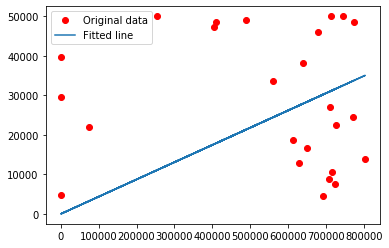

In [0]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
     # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(error, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "error=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_error = sess.run(error, feed_dict={X: train_X, Y: train_Y})
    print("Training error=", training_error, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
   



    
